In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [178]:
test=pd.read_csv("test.csv")
trian=pd.read_csv("train.csv")
gender=pd.read_csv("gender_submission.csv")
htest=pd.merge(test,gender,on="PassengerId",how="inner")
df=pd.concat([trian,htest])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [180]:
df=df.drop("PassengerId",axis=1)

In [181]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [182]:
df.Pclass=df.Pclass.astype("object")
df.Survived=df.Survived.astype("object")

In [183]:
categorical=[col for col in df.columns if df[col].dtype=="object"]
categorical

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [184]:
numircal=[col for col in df.columns if df[col].dtype!="object"]
numircal

['Age', 'SibSp', 'Parch', 'Fare']

In [185]:
y=df.Survived
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

<AxesSubplot:>

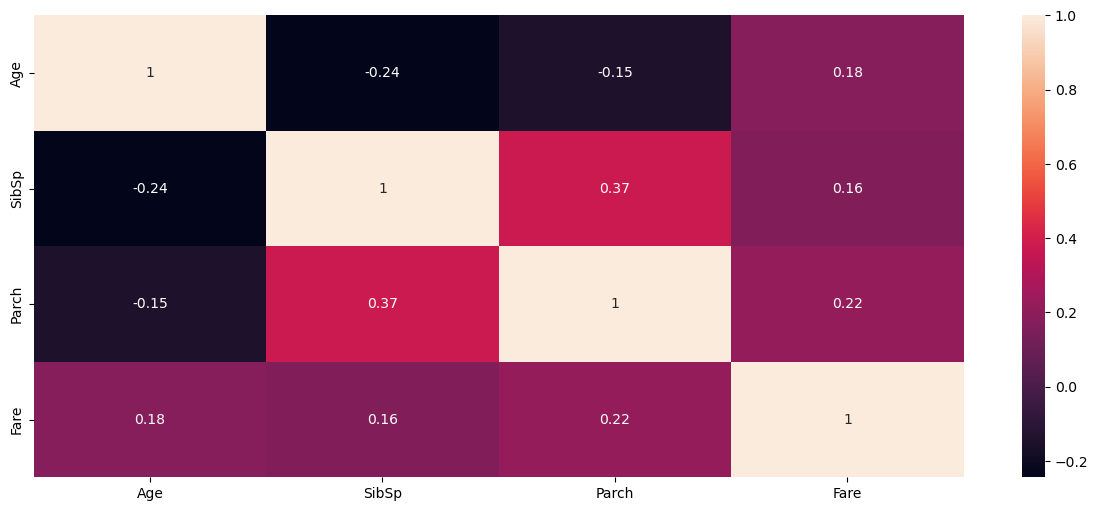

In [186]:
plt.figure(figsize=(15,6))
sns.heatmap(df[numircal].corr(),annot=True)

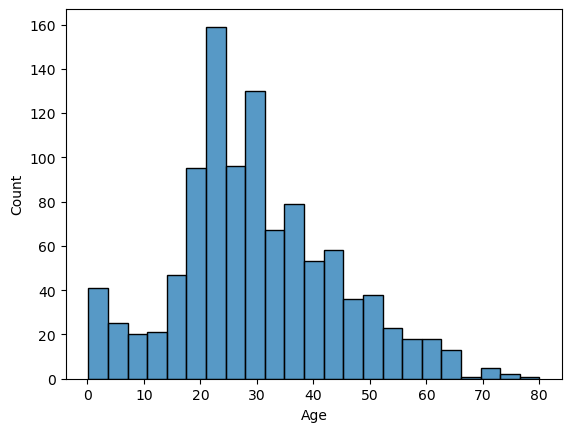

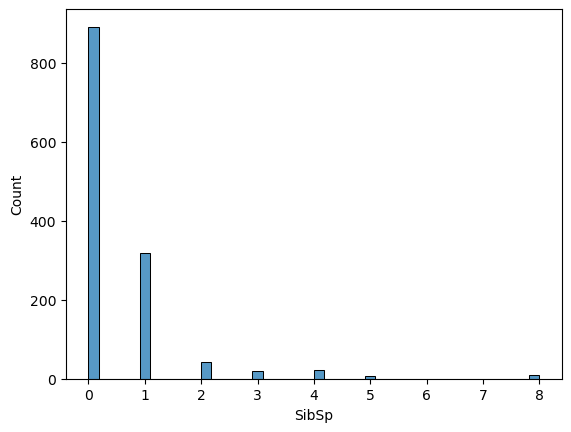

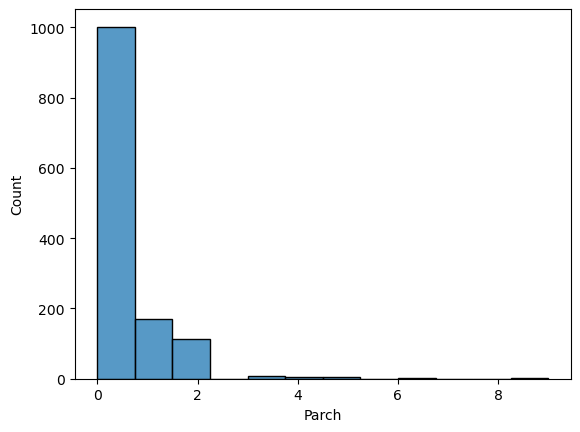

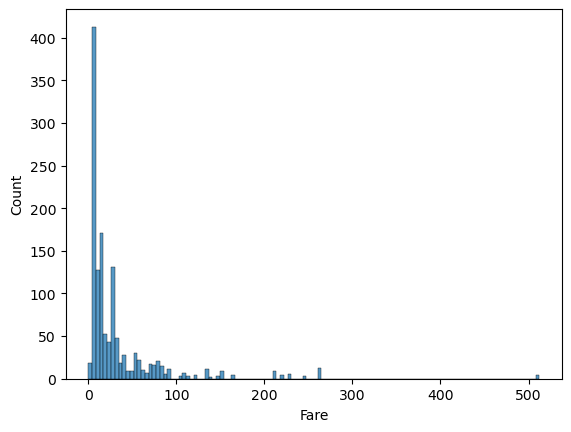

In [187]:
for i in numircal:
    sns.histplot(df[i])
    plt.show()
    

In [188]:
pd.pivot_table(df,index="Survived", values=numircal)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.510986,23.879124,0.311656,0.496933
1,28.931079,48.811497,0.506073,0.502024


In [189]:
df=df.drop(["SibSp"],axis=1)

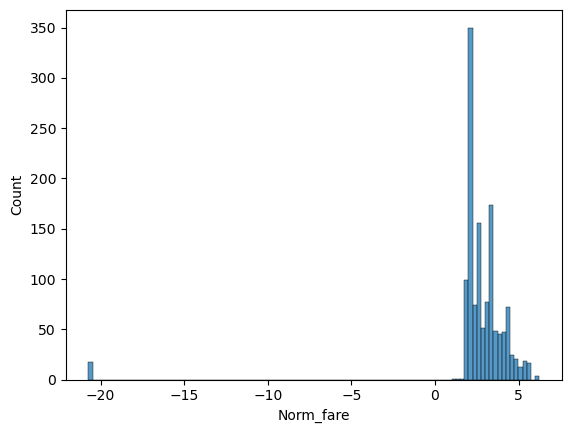

In [190]:
df["Norm_fare"]=np.log(df.Fare+0.000000001)
sns.histplot(df["Norm_fare"])
plt.show()


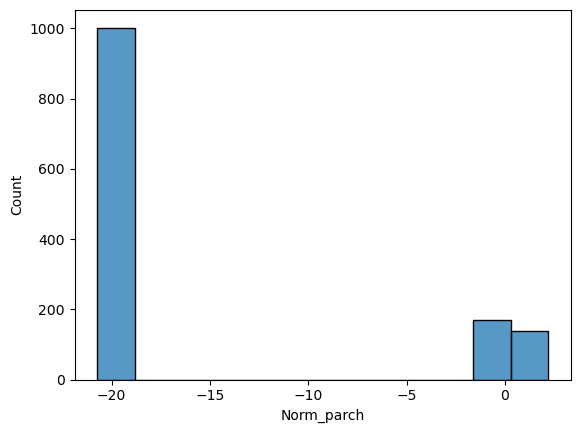

In [191]:
df["Norm_parch"]=np.log(df.Parch+0.000000001)
sns.histplot(df["Norm_parch"])
plt.show()

In [192]:
df.drop(["Fare","Norm_parch"],axis=1,inplace=True)

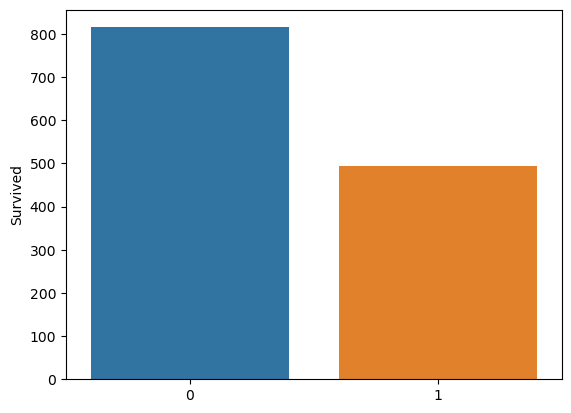

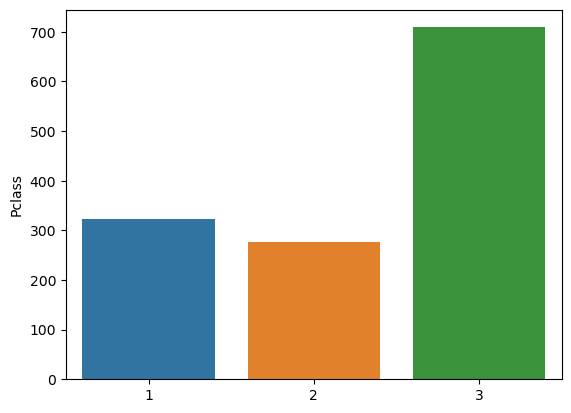

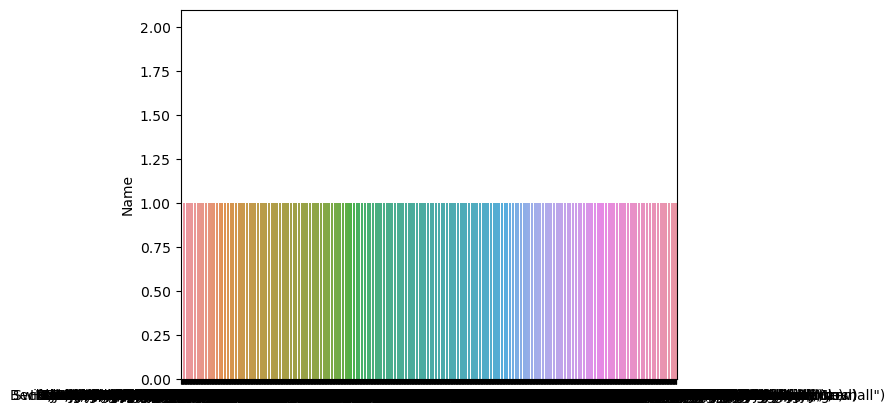

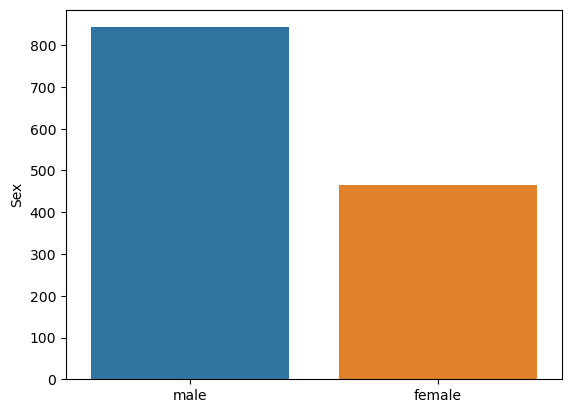

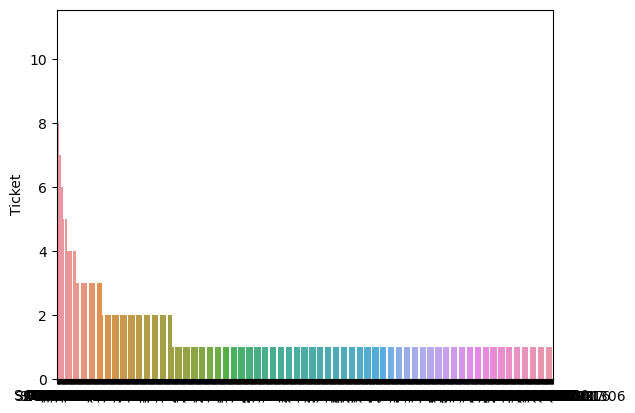

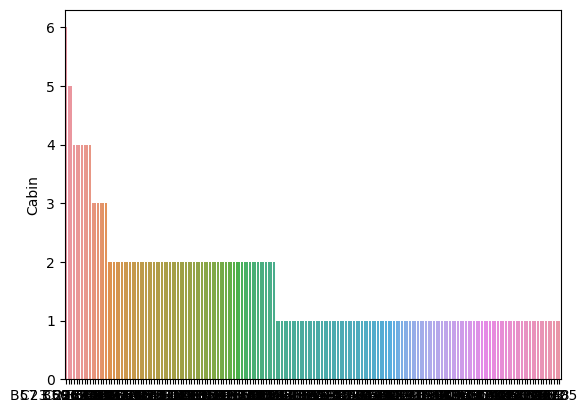

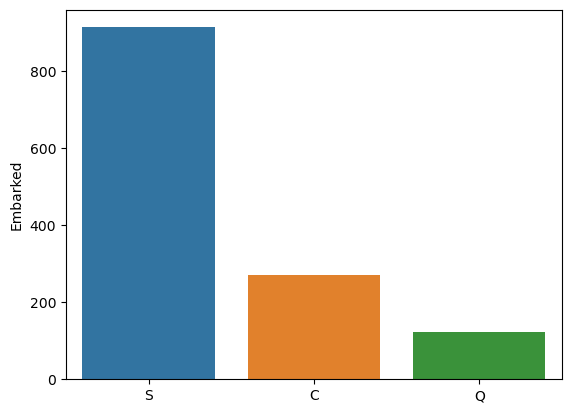

In [193]:
for i in categorical:
    sns.barplot(data = df,x =df[i].value_counts().index,y = df[i].value_counts())
    plt.show()

In [194]:
categorical

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [195]:
for i in categorical:
    dgroup=df.groupby(i).Survived.agg(["mean"])
    display(dgroup)

,mean
Survived,
0,0.0
1,1.0


,mean
Pclass,
1,0.575851
2,0.422383
3,0.269394


,mean
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Master. Eugene Joseph",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelseth, Miss. Karen Marie",1.0
...,...
"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",1.0
"van Billiard, Master. James William",0.0
"van Billiard, Master. Walter John",0.0


,mean
Sex,
female,0.82618
male,0.12930


,mean
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110469,0.000000
110489,0.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.500000


,mean
Cabin,
A10,0.0
A11,1.0
A14,0.0
A16,1.0
A18,0.0
...,...
F33,1.0
F38,0.0
F4,1.0


,mean
Embarked,
C,0.492593
Q,0.439024
S,0.333698


In [196]:
name=df.Name

In [197]:
df["Name_title"]=df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
df.Name_title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name_title, dtype: int64

In [198]:
d_group=df.groupby("Name_title").Survived.agg(["mean"])
display(d_group)

,mean
Name_title,
Capt,0.000000
Col,0.250000
Don,0.000000
Dona,1.000000
Dr,0.375000
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.377049


In [199]:
ticket=df.Ticket

In [200]:
df["is_numeric_ticket"]=df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df.is_numeric_ticket.value_counts()

1    957
0    352
Name: is_numeric_ticket, dtype: int64

In [201]:
d_group=df.groupby("is_numeric_ticket").Survived.agg(["mean"])
display(d_group)

,mean
is_numeric_ticket,
0,0.389205
1,0.373041


In [202]:
cabin=df.Cabin

In [203]:
df["Multiple_cabin"]=df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
df.Multiple_cabin.value_counts()


0    1014
1     254
2      26
3      10
4       5
Name: Multiple_cabin, dtype: int64

In [204]:
d_group=df.groupby("Multiple_cabin").Survived.agg(["mean"])
display(d_group)

,mean
Multiple_cabin,
0,0.309665
1,0.622047
2,0.500000
3,0.600000
4,0.600000


In [205]:
df["Cabin_class"]=df.Cabin.apply(lambda x: str(x)[0])
df.Cabin_class.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_class, dtype: int64

In [206]:
d_group=df.groupby("Cabin_class").Survived.agg(["mean"])
display(d_group)

,mean
Cabin_class,
A,0.454545
B,0.676923
C,0.574468
D,0.652174
E,0.682927
F,0.523810
G,0.600000
T,0.000000
n,0.309665


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           1309 non-null   object 
 1   Pclass             1309 non-null   object 
 2   Name               1309 non-null   object 
 3   Sex                1309 non-null   object 
 4   Age                1046 non-null   float64
 5   Parch              1309 non-null   int64  
 6   Ticket             1309 non-null   object 
 7   Cabin              295 non-null    object 
 8   Embarked           1307 non-null   object 
 9   Norm_fare          1308 non-null   float64
 10  Name_title         1309 non-null   object 
 11  is_numeric_ticket  1309 non-null   int64  
 12  Multiple_cabin     1309 non-null   int64  
 13  Cabin_class        1309 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 153.4+ KB


In [208]:
df.drop(["Name","Ticket","Cabin","Cabin_class"],axis=1,inplace=True)
df.is_numeric_ticket=df.is_numeric_ticket.astype("object")

In [209]:
df.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                  263
Parch                  0
Embarked               2
Norm_fare              1
Name_title             0
is_numeric_ticket      0
Multiple_cabin         0
dtype: int64

In [210]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.dropna(subset=["Embarked","Norm_fare"],inplace=True)

In [211]:
df.Multiple_cabin=df.Multiple_cabin.astype("object")
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [212]:
categorical=[i for i in x.columns if x[i].dtype =="object"]
categorical

['Pclass',
 'Sex',
 'Embarked',
 'Name_title',
 'is_numeric_ticket',
 'Multiple_cabin']

In [213]:
x.isnull().sum()

Pclass               0
Sex                  0
Age                  0
Parch                0
Embarked             0
Norm_fare            0
Name_title           0
is_numeric_ticket    0
Multiple_cabin       0
dtype: int64

In [214]:
x[categorical]=x[categorical].astype(str)
x=pd.get_dummies(x,columns=categorical)

In [215]:
y=y.astype("int32")

In [216]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [217]:
model = LogisticRegression()
CV  = cross_val_score(model,x,y,cv= 5)
print(CV)
print(CV.mean())

[0.80152672 0.81226054 0.77011494 0.90804598 0.97701149]
0.8537919335497646
